## TASK GIVEN 
- To predict the Customer life time value for an auto insurance company based on different quantitative and qualitative features.

#### The target variable in our data is of continuous values
- The probelm is of 'REGRESSION'

# <center> Customer Life Time Value prediction on insurance data set </center>
___


| Feature | Description | Data Type |
| --- | --- | --- |
| Customer.Lifetime.Value | the life time value to predict. | TARGET |
| Coverage | Type of cover | Categorical |
| Education | Type of education | Categorical |
| EmploymentStatus | Type of employment | Categorical |
| Gender | Male or female | Categorical |
| Income| value of income | Numeric |
| Location.Geo | Coordinates | Numeric |
| Location.Code | type of place | Categorical |
| Marital.Status | Marital description | Categorical |
| Monthly.Premium.Auto | Monthly premium | Numeric |
| Months.Since.Last.Claim | Claim month | Numerical |
| Months.Since.Policy.Inception | Inception month | Numerical |
| Number.of.Open.Complaints | Number of complaints | Numerical |
| Number.of.Policies | policies taken | Numerical |
| Policy.Type | Type of policy | Categorical |
| Policy | Policy chosen | Categorical |
| Renew.Offer.Type | Type of offer | Categorical |
| Sales.Channel | Through what sale is done | Categorical |
| Total.Claim.Amount | Amount claimed | Numerical |
| Vehicle.Class | Classs of vehicle | Categorical |
| Vehicle.Size | Size of vehicle | Categorical |

**The goal is to predict Customer life time value.**
___

## Importing the libraries to work on the data set

In [1]:
import pandas as pd
import numpy as np

# skip warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action = 'ignore', category = DeprecationWarning)
warnings.filterwarnings(action = 'ignore', category = FutureWarning)

## Reading the train and the test files

In [2]:
auto=pd.read_csv("train-hackathon.csv")
auto_test=pd.read_csv("test-hackathon.csv")

## lets see the shape of the train and test files 

In [3]:
auto.shape

(9806, 22)

### The train data has 9806 observations and 22 columns

In [4]:
auto_test.shape

(1767, 21)

### The test data has 1767 observations and 21 columns

In [5]:
## Setting the display options to see all the columns 
def set_pandas_display_options() :

    pd.options.display.max_columns = 25
    pd.options.display.max_rows = 25
    pd.options.display.max_colwidth = 25
    pd.options.display.precision = 4

set_pandas_display_options()

## Lets look at the portion of the train and test data 

In [6]:
auto.head()

,CustomerID,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,5917,7824.3728,Basic,Bachelor,Unemployed,F,0,"17.7,77.7",Urban,Married,67.0,2,33,NaN,2.0,Personal Auto,Personal L2,Offer2,Branch,267.2144,Four-Door Car,2.0
1,2057,8005.9647,Basic,College,Employed,M,63357,"28.8,76.6",Suburban,Married,101.0,26,42,0.0,5.0,Personal Auto,Personal L2,Offer2,Agent,565.5086,SUV,2.0
2,4119,8646.5041,Basic,High School or Below,Employed,F,64125,"21.6,88.4",Urban,Married,108.0,3,44,0.0,3.0,Personal Auto,Personal L1,Offer2,Branch,369.8187,SUV,1.0
3,1801,9294.0887,Basic,College,Employed,M,67544,"19,72.5",Suburban,Married,116.0,2,15,NaN,3.0,Corporate Auto,Corporate L3,Offer1,Branch,556.8000,SUV,3.0
4,9618,5595.9714,Basic,Bachelor,Retired,F,19651,"19.1,74.7",Suburban,Married,72.0,3,68,0.0,5.0,Personal Auto,Personal L1,Offer2,Web,345.6000,Two-Door Car,3.0


In [7]:
auto_test.head()

,CustomerID,Coverage,Education,EmploymentStatus,Gender,Income,Location.Geo,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size
0,17,Basic,Bachelor,Employed,M,43836.0,"12.6,79.4",Rural,Single,73.0,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.1309,Four-Door Car,Medsize
1,19,Extended,College,Employed,F,28812.0,"17.3,78.4",Urban,Married,93.0,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.5278,Four-Door Car,Medsize
2,29,Premium,Master,Employed,M,77026.0,"18.4,73.5",Urban,Married,110.0,9,82,2,3,Corporate Auto,Corporate L1,Offer2,Agent,472.0297,Four-Door Car,Medsize
3,34,Basic,Bachelor,Employed,F,24599.0,"17.1,78.2",Rural,Married,64.0,12,50,1,2,Corporate Auto,Corporate L2,Offer2,Branch,42.9203,Four-Door Car,Medsize
4,37,Extended,Bachelor,Disabled,F,13789.0,"13,80.1",Suburban,Divorced,79.0,8,49,0,1,Personal Auto,Personal L3,Offer4,Call Center,379.2000,Four-Door Car,Medsize


## Key insights 
- We have a geographic location column which we can split into latitude and longitude
- We have vehicle size in train as numbers and in test as text category so we can encode test according to the train 

In [8]:
auto[['Latitude','Longitude']]=auto['Location.Geo'].str.split(",",expand=True)

In [9]:
auto_test[['Latitude','Longitude']]=auto['Location.Geo'].str.split(",",expand=True)

## Extracted latitude and longitude from the Location Geo column
- we can drop this column of location Geo now 

In [10]:
auto.drop(['Location.Geo'],axis=1,inplace=True)

In [11]:
auto_test.drop(['Location.Geo'],axis=1,inplace=True)

In [12]:
auto.columns

Index(['CustomerID', 'Customer.Lifetime.Value', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location.Code',
       'Marital.Status', 'Monthly.Premium.Auto', 'Months.Since.Last.Claim',
       'Months.Since.Policy.Inception', 'Number.of.Open.Complaints',
       'Number.of.Policies', 'Policy.Type', 'Policy', 'Renew.Offer.Type',
       'Sales.Channel', 'Total.Claim.Amount', 'Vehicle.Class', 'Vehicle.Size',
       'Latitude', 'Longitude'],
      dtype='object')

## we have dropped the column location Geo

- Lets check the data type of the variables

In [13]:
auto.dtypes

CustomerID                         int64
Customer.Lifetime.Value          float64
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                            object
Location.Code                     object
Marital.Status                    object
Monthly.Premium.Auto             float64
Months.Since.Last.Claim            int64
Months.Since.Policy.Inception      int64
Number.of.Open.Complaints        float64
Number.of.Policies               float64
Policy.Type                       object
Policy                            object
Renew.Offer.Type                  object
Sales.Channel                     object
Total.Claim.Amount               float64
Vehicle.Class                     object
Vehicle.Size                     float64
Latitude                          object
Longitude                         object
dtype: object

## Our latitude,income and longitude column is being read as object so it means it contains some String values 
Let us write a small code to verify which string values are present in our column. 

- We will run a loop to convert each value in the column to float.
- If the float conversion is unsuccessful that means the value is string and we will get a `ValueError`.
- We will use this error to find out the invalid values.

This can be accomplished by exception handling in Python using `try-catch-except` blocks.

In [14]:
def invalid_check(data):
    for col in ['Latitude','Longitude','Income'] :
        print('\n', col, ' ----->>')
        for index in range(0, len(data)):
            try :
                skip = float(data.loc[index, col])
            except ValueError :
                print(index, data.loc[index, col])

In [15]:
# checking for train and test data both
invalid_check(auto)


 Latitude  ----->>
51 NA
87 NA
109 NA
168 NA
283 NA
312 NA
320 NA
445 NA
553 NA
674 NA
797 NA
932 NA
1035 NA
1052 NA
1150 NA
1201 NA
1237 NA
1351 NA
1416 NA
1438 NA
1487 NA
1498 NA
1686 NA
1921 NA
1977 NA
2072 NA
2098 NA
2301 NA
2549 NA
2608 NA
2884 NA
3484 NA
3537 NA
3574 NA
3595 NA
3727 NA
3728 NA
3838 NA
3894 NA
3916 NA
3938 NA
4065 NA
4133 NA
4153 NA
4326 NA
4435 NA
4461 NA
4574 NA
4659 NA
4811 NA
5102 NA
5228 NA
5257 NA
5284 NA
5462 NA
5614 NA
5794 NA
5943 NA
5954 NA
5992 NA
6140 NA
6144 NA
6228 NA
6423 NA
6517 NA
6540 NA
6578 NA
6625 NA
6656 NA
6723 NA
6806 NA
6840 NA
6867 NA
6973 NA
6982 NA
7012 NA
7112 NA
7273 NA
7411 NA
7437 NA
7502 NA
7503 NA
7509 NA
7553 NA
7593 NA
7864 NA
7909 NA
7943 NA
8020 NA
8053 NA
8139 NA
8158 NA
8173 NA
8212 NA
8313 NA
8431 NA
8587 NA
8615 NA
8656 NA
8678 NA
8737 NA
8763 NA
8782 NA
8865 NA
8890 NA
9083 NA
9183 NA
9319 NA
9323 NA
9402 NA
9480 NA
9500 NA
9507 NA
9538 NA
9556 NA
9589 NA
9639 NA
9643 NA
9785 NA

 Longitude  ----->>
51 NA
87 NA
109 NA
16

In [16]:
## checking for test
invalid_check(auto_test)


 Latitude  ----->>
51 NA
87 NA
109 NA
168 NA
283 NA
312 NA
320 NA
445 NA
553 NA
674 NA
797 NA
932 NA
1035 NA
1052 NA
1150 NA
1201 NA
1237 NA
1351 NA
1416 NA
1438 NA
1487 NA
1498 NA
1686 NA

 Longitude  ----->>
51 NA
87 NA
109 NA
168 NA
283 NA
312 NA
320 NA
445 NA
553 NA
674 NA
797 NA
932 NA
1035 NA
1052 NA
1150 NA
1201 NA
1237 NA
1351 NA
1416 NA
1438 NA
1487 NA
1498 NA
1686 NA

 Income  ----->>


### we have NA as string values in latitude and longitude and ? in income
- we will change it to numeric 

In [20]:
def convert(data):
    for i in ['Latitude','Longitude','Income']:
        data[i] = pd.to_numeric(data[i], errors='coerce')


In [21]:
## converting the values NA to NaN of both train and test
convert(auto)
convert(auto_test)

In [22]:
auto.dtypes

CustomerID                         int64
Customer.Lifetime.Value          float64
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                           float64
Location.Code                     object
Marital.Status                    object
Monthly.Premium.Auto             float64
Months.Since.Last.Claim            int64
Months.Since.Policy.Inception      int64
Number.of.Open.Complaints        float64
Number.of.Policies               float64
Policy.Type                       object
Policy                            object
Renew.Offer.Type                  object
Sales.Channel                     object
Total.Claim.Amount               float64
Vehicle.Class                     object
Vehicle.Size                     float64
Latitude                         float64
Longitude                        float64
dtype: object

## We will check if our customer id is unique we will change it to row index

In [23]:
auto.CustomerID.nunique()

9806

In [24]:
auto_test.CustomerID.nunique()

1767

In [25]:
## changing customer id to row index
auto.set_index('CustomerID', inplace = True)
auto_test.set_index('CustomerID', inplace = True)

In [26]:
# seeing statistical attributes data
auto.describe(include='all')

,Customer.Lifetime.Value,Coverage,Education,EmploymentStatus,Gender,Income,Location.Code,Marital.Status,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Policy.Type,Policy,Renew.Offer.Type,Sales.Channel,Total.Claim.Amount,Vehicle.Class,Vehicle.Size,Latitude,Longitude
count,9806.0000,8881,9677,9688,9677,9688.0000,9687,9677,9012.0000,9806.0000,9806.0000,8988.0000,9685.0000,8915,9685,9678,9678,9806.0000,9680,9680.0000,9687.0000,9687.0000
unique,NaN,3,5,5,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN,3,9,4,4,NaN,6,NaN,NaN,NaN
top,NaN,Basic,Bachelor,Employed,F,NaN,Suburban,Married,NaN,NaN,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,NaN,NaN,NaN
freq,NaN,5361,2934,6020,4985,NaN,6204,5643,NaN,NaN,NaN,NaN,NaN,6620,3637,3975,3670,NaN,4869,NaN,NaN,NaN
mean,7998.0470,NaN,NaN,NaN,NaN,37511.0546,NaN,NaN,93.3407,15.1440,48.1650,0.3792,2.9604,NaN,NaN,NaN,NaN,438.2667,NaN,2.0898,20.1717,77.3869
std,6848.0559,NaN,NaN,NaN,NaN,30292.9745,NaN,NaN,34.4178,10.0043,27.9636,0.8964,2.3898,NaN,NaN,NaN,NaN,293.5023,NaN,0.5385,4.6736,4.5754
min,1898.0077,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,61.0000,0.0000,0.0000,0.0000,1.0000,NaN,NaN,NaN,NaN,0.0990,NaN,1.0000,12.0000,70.2000
25%,4013.9490,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,68.7500,6.0000,24.0000,0.0000,1.0000,NaN,NaN,NaN,NaN,280.3528,NaN,2.0000,17.4000,73.4000
50%,5780.1822,NaN,NaN,NaN,NaN,33767.5000,NaN,NaN,83.0000,14.0000,48.0000,0.0000,2.0000,NaN,NaN,NaN,NaN,384.0070,NaN,2.0000,18.9000,77.4000
75%,8960.2802,NaN,NaN,NaN,NaN,62018.0000,NaN,NaN,109.0000,23.0000,71.7500,0.0000,4.0000,NaN,NaN,NaN,NaN,553.5410,NaN,2.0000,22.4000,79.0000


## Key Insights
- The minimum value vale of Customer Lifetime value is 1898 . The standard deviation is also high 
- The area consists of mostly suburban region 
- The Basic coverage is opted most 
- Most of the people are employed. Shows a good buying capacity 
- The income goes from 0 to high values 

In [27]:
auto['Number.of.Open.Complaints'].value_counts()

0.0    7130
1.0    1019
2.0     370
3.0     277
4.0     142
5.0      50
Name: Number.of.Open.Complaints, dtype: int64

In [28]:
auto['Number.of.Policies'].value_counts()

1.0    3459
2.0    2433
3.0    1240
7.0     460
9.0     446
5.0     434
4.0     429
8.0     401
6.0     383
Name: Number.of.Policies, dtype: int64

In [29]:
auto['Vehicle.Size'].value_counts()

2.0    6795
3.0    1877
1.0    1008
Name: Vehicle.Size, dtype: int64

In [30]:
auto_test['Vehicle.Size'].value_counts()

Medsize    1252
Small       343
Large       172
Name: Vehicle.Size, dtype: int64

### Insights 
- after seeing the value counts of the variables I can convert those variables in category which were in float
- The vehicle size in test data is Medium small and large i will replace my vehicle size in test as given in  train 

In [32]:
auto['Number.of.Open.Complaints'].replace({0.0: '0',1.0 : '1', 2.0 : '2',3.0 : '3',4.0 : '4',5.0 : '5'},inplace=True)

In [33]:
auto['Number.of.Policies'].replace({1.0: '1',2.0 : '2', 3.0 : '3',4.0 : '4',5.0 : '5',6.0 : '6',7.0:'7',8:'8',9:'9'},inplace=True)

In [34]:
auto['Vehicle.Size'].replace({1.0:'1',2.0:'2',3.0:'3'},inplace=True)

### I have chnaged the train values accordingly with the test so that there should be same dimension or type 

In [35]:



auto_test['Vehicle.Size'].replace({'Small':1,'Medsize':2,'Large':3},inplace=True)

## Creating Categorical and numerical columns 

In [36]:
num_cols=['Income','Monthly.Premium.Auto','Total.Claim.Amount','Latitude','Longitude','Months.Since.Last.Claim','Months.Since.Policy.Inception']
cat_cols=auto.columns[~auto.columns.isin(num_cols)]
cat_cols= cat_cols.delete(0)
cat_cols

Index(['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location.Code',
       'Marital.Status', 'Number.of.Open.Complaints', 'Number.of.Policies',
       'Policy.Type', 'Policy', 'Renew.Offer.Type', 'Sales.Channel',
       'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

In [ ]:
## converting categorical variables to category type 

In [37]:
def category(data):
    for i in cat_cols:
        data[i]=data[i].astype('category')

In [38]:
category(auto)
category(auto_test)

In [39]:
auto.dtypes

Customer.Lifetime.Value           float64
Coverage                         category
Education                        category
EmploymentStatus                 category
Gender                           category
Income                            float64
Location.Code                    category
Marital.Status                   category
Monthly.Premium.Auto              float64
Months.Since.Last.Claim             int64
Months.Since.Policy.Inception       int64
Number.of.Open.Complaints        category
Number.of.Policies               category
Policy.Type                      category
Policy                           category
Renew.Offer.Type                 category
Sales.Channel                    category
Total.Claim.Amount                float64
Vehicle.Class                    category
Vehicle.Size                     category
Latitude                          float64
Longitude                         float64
dtype: object

In [40]:
auto_test.dtypes

Coverage                         category
Education                        category
EmploymentStatus                 category
Gender                           category
Income                            float64
Location.Code                    category
Marital.Status                   category
Monthly.Premium.Auto              float64
Months.Since.Last.Claim             int64
Months.Since.Policy.Inception       int64
Number.of.Open.Complaints        category
Number.of.Policies               category
Policy.Type                      category
Policy                           category
Renew.Offer.Type                 category
Sales.Channel                    category
Total.Claim.Amount                float64
Vehicle.Class                    category
Vehicle.Size                     category
Latitude                          float64
Longitude                         float64
dtype: object

## checking for missing values

In [41]:
# Missing values
def missing_check(data):
    missing_values = data.isnull().sum().sort_values(ascending = False)
    percentage_missing_values = (missing_values/len(data))*100
    print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing']))

In [42]:
missing_check(auto)

                           Missing values  % Missing
Coverage                              925     9.4330
Policy.Type                           891     9.0863
Number.of.Open.Complaints             818     8.3418
Monthly.Premium.Auto                  794     8.0971
Gender                                129     1.3155
Education                             129     1.3155
Marital.Status                        129     1.3155
Sales.Channel                         128     1.3053
Renew.Offer.Type                      128     1.3053
Vehicle.Size                          126     1.2849
Vehicle.Class                         126     1.2849
Number.of.Policies                    121     1.2339
Policy                                121     1.2339
Latitude                              119     1.2135
Location.Code                         119     1.2135
Longitude                             119     1.2135
EmploymentStatus                      118     1.2033
Income                                118     

In [43]:
missing_check(auto_test)

                           Missing values  % Missing
Income                                239    13.5257
Monthly.Premium.Auto                   72     4.0747
Policy.Type                            42     2.3769
Longitude                              23     1.3016
Latitude                               23     1.3016
Months.Since.Last.Claim                 0     0.0000
Education                               0     0.0000
EmploymentStatus                        0     0.0000
Gender                                  0     0.0000
Location.Code                           0     0.0000
Marital.Status                          0     0.0000
Number.of.Open.Complaints               0     0.0000
Months.Since.Policy.In...               0     0.0000
Number.of.Policies                      0     0.0000
Policy                                  0     0.0000
Renew.Offer.Type                        0     0.0000
Sales.Channel                           0     0.0000
Total.Claim.Amount                      0     

### There are a lot of missing values in our train set . 
-  We will impute it using the k neighbours
-  we will use the same to fill missing values in our test set 

In [44]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.neighbors import KNeighborsRegressor

num_imputer = IterativeImputer(estimator = KNeighborsRegressor(n_neighbors = 5))


auto[num_cols]=num_imputer.fit_transform(auto[num_cols])
auto_test[num_cols] = num_imputer.transform(auto_test[num_cols])




In [45]:
from sklearn.impute import SimpleImputer
cat_imputer = SimpleImputer(strategy = 'most_frequent')
auto[cat_cols] = cat_imputer.fit_transform(auto[cat_cols])
auto_test[cat_cols] = cat_imputer.transform(auto_test[cat_cols])

## Lets see the Visualization 


In [46]:
auto[cat_cols]=auto[cat_cols].astype('category')
auto_test[cat_cols]=auto[cat_cols].astype('category')

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

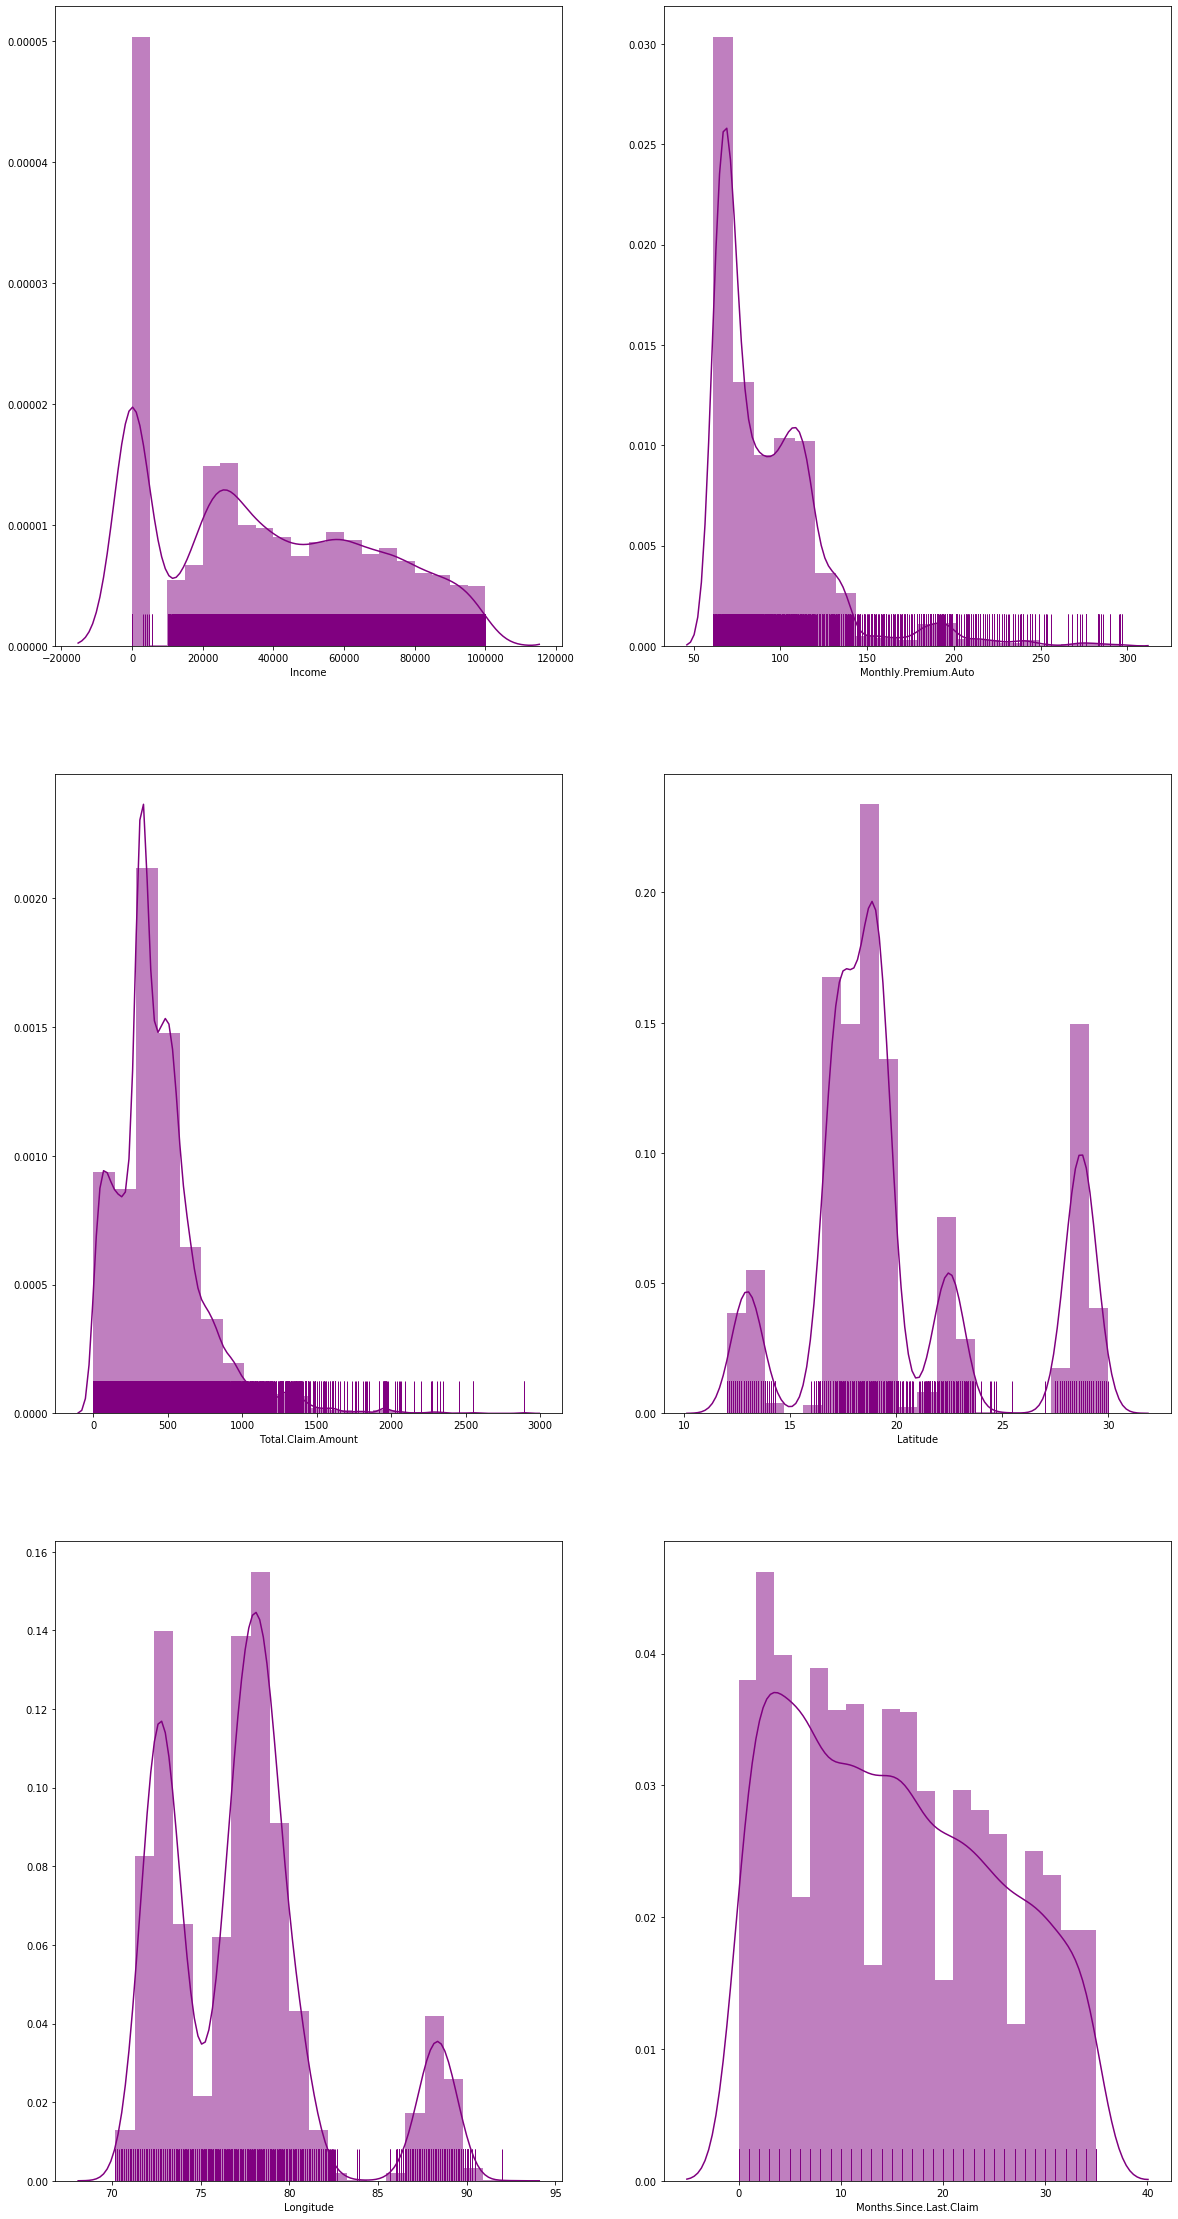

In [48]:
fig, ax = plt.subplots(3, 2, figsize = (20, 40))

for var, subplot in zip(num_cols, ax.flatten()):
    sns.distplot(auto[var], bins = 20, kde = True, rug = True, color = 'purple', 
                 ax = subplot, hist_kws = {"alpha": 0.5})

## Some insights 
- The monthly claim is right skewed and shows more outliers
- The Latitude and Longitude show points where there is no data. we can use these columns to cluster segments of customers

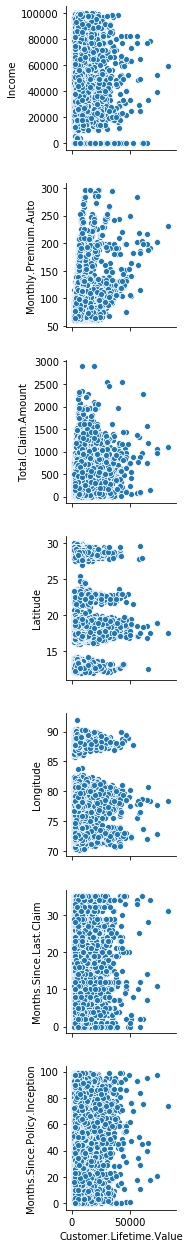

In [49]:
sns.pairplot(x_vars=['Customer.Lifetime.Value'],y_vars=num_cols,data=auto)

## Insights 
- The latitude and longitude plots have breaks where there is no data points. it shows that the at some places there may not be
  insured people . we can escape these regions from our model
- The people with high monthly premiun value have high customer life time value. There seems to be a linear relationship         between them .

In [50]:
cat_cols

Index(['Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location.Code',
       'Marital.Status', 'Number.of.Open.Complaints', 'Number.of.Policies',
       'Policy.Type', 'Policy', 'Renew.Offer.Type', 'Sales.Channel',
       'Vehicle.Class', 'Vehicle.Size'],
      dtype='object')

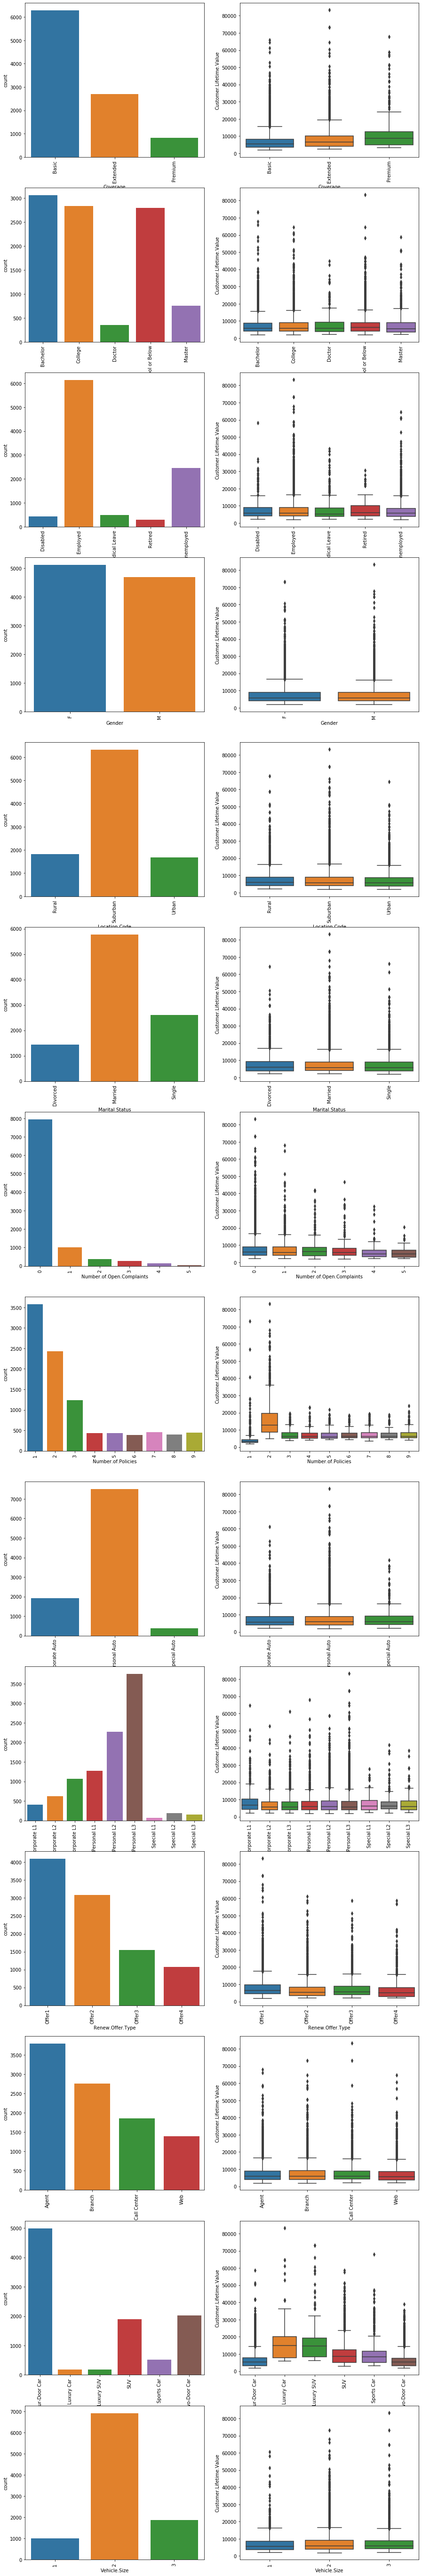

In [51]:
# seeing categorical variables relation with target using box plot 
fig, ax = plt.subplots(14, 2, figsize = (15, 100))


for var, [subplotA, subplotB] in zip(cat_cols, ax):
    
    sns.countplot(auto[var], ax = subplotA)
    for label in subplotA.get_xticklabels() :
        label.set_rotation(90)
        
    sns.boxplot(x = var, y = 'Customer.Lifetime.Value', data = auto, ax = subplotB)
    for label in subplotB.get_xticklabels() :
        label.set_rotation(90)


## Key findings  from the box plots.
- Coverage shows premium type have high customer lifetime values. It is a important categorical column
- The vehicle class shows that those having luxury cars gave higher customer lifetime value than others 
- Some variables categories can be merged as feature engineering like "Basic and extended can be merged together"
- In cars the "sports and suv" can be merged and "luxury car and  luxury suv" can be merged
<div class="alert alert-block alert-info"><b> 

- Vehicle size, Sales.Channel, Marital status, Gender ,Education dont show variance in respect to Customer lifetime value.
- These can be dropped

</b></div>

### Building Models

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

- Function for preparing data(train and test splitting)

In [53]:
def prepare_data(X, y, split_size = 0.3) :
    
    
    ## train test split
    X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                        test_size = split_size)  
    
   
    
    
    print(X_train.shape)
    print(X_val.shape)
    
    return X_train, X_val, y_train, y_val

- Function for pre processing(dummification)

In [58]:
def preprocess_data(data) :
    
    data = pd.get_dummies(data, drop_first = False)

    return data

- Function for model building with cross validation

In [59]:
def model_building(X, y, test, model,params,k) :
    
        model_cv = GridSearchCV(model,param_grid=params, cv = k)
        
        ## Fit model_cv using 
        model_cv.fit(X, y)
        
        ## check best estimator 
        model = model_cv.best_estimator_

        # return and extra object for all cross validation operations
        return (model_cv, model, model.predict(X), model.predict(test))

- Function for model evaluation (metric used Mean squared error and Root mean squared error)

In [60]:
def model_evaluation(y_train, pred_train, y_test, pred_test) :
    
    print('''
             =========================================
                MAE and MSE FOR TRAIN DATA
             =========================================''')
    print("Mean Absolute Error : ", (mean_absolute_error(y_train, pred_train), 
          "\nRootMean Squared Error : ",np.sqrt(mean_squared_error(y_train, pred_train))))
    
    print('''
             =========================================
                MAE and MSE FOR TEST DATA
             =========================================''')
    print("Mean Absolute Error : ", mean_absolute_error(y_test, pred_test), 
          "\nRootMean Squared Error : ", np.sqrt(mean_squared_error(y_test, pred_test)))

In [61]:
# Splitting data in feature and target set
X=auto.drop('Customer.Lifetime.Value',axis=1)
y=auto['Customer.Lifetime.Value']

In [62]:
X_train, X_val, y_train, y_val=prepare_data(X,y,0.3)

(6864, 21)
(2942, 21)


In [63]:
X_train_d=preprocess_data(X_train)
X_val_d=preprocess_data(X_val)


In [64]:
# Creating a list with models and their parameters
estimators = [(DecisionTreeRegressor(),{'max_depth' : range(1,10), 
                                      'min_impurity_decrease' : [0.0001, 0.01]}),
              (AdaBoostRegressor(), {'n_estimators' : [100], 
                                      'learning_rate' : [0.1]}), 
              (RandomForestRegressor(), {'n_estimators' : [ 25, 50], 
                                          'max_depth' : [ 14, 16, 18], 
                                          'min_samples_leaf' : [5, 10]}), 
              (GradientBoostingRegressor(), {'n_estimators' : [100], 
                                              'max_depth' : [5, 10], 
                                              'learning_rate' : [0.1]}), 
              (XGBRegressor(), {'colsample_bytree': [0.6], 
                                 'n_estimators':[100], 
                                 'max_depth': [10, 15]})]

In [65]:
for estimator, parameters in estimators :
    
    model_cv, model, pred_train, pred_test = model_building(X_train_d, y_train,
                                                            X_val_d, estimator, parameters, 10)
    
    print('===================================================================\n\t\t\t',
          type(estimator).__name__,
          '\n===================================================================\n')
    
    print(model_cv.best_params_, '\n\n')
    
    model_evaluation(y_train, pred_train, y_val, pred_test)

			 DecisionTreeRegressor 

{'max_depth': 4, 'min_impurity_decrease': 0.0001} 



                MAE and MSE FOR TRAIN DATA
Mean Absolute Error :  (1917.205601360314, '\nRootMean Squared Error : ', 3946.0889977163815)

                MAE and MSE FOR TEST DATA
Mean Absolute Error :  2114.057143330187 
RootMean Squared Error :  4227.270906634479
			 AdaBoostRegressor 

{'learning_rate': 0.1, 'n_estimators': 100} 



                MAE and MSE FOR TRAIN DATA
Mean Absolute Error :  (2951.5761152920463, '\nRootMean Squared Error : ', 4423.98866102012)

                MAE and MSE FOR TEST DATA
Mean Absolute Error :  3147.177826099028 
RootMean Squared Error :  4739.982785513591
			 RandomForestRegressor 

{'max_depth': 16, 'min_samples_leaf': 5, 'n_estimators': 50} 



                MAE and MSE FOR TRAIN DATA
Mean Absolute Error :  (1108.3389079154435, '\nRootMean Squared Error : ', 2723.496850085405)

                MAE and MSE FOR TEST DATA
Mean Absolute Error :  1785.823740209866 


In [66]:
# using decision tree regressor model for prediction 
dtr=DecisionTreeRegressor(max_depth=4,min_impurity_decrease= 0.0001)

In [67]:
# fitting the model on train
dtr.fit(X_train_d,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0001,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [69]:
auto_test_d=preprocess_data(auto_test)

In [70]:
#predicting on test data
Test_pred=dtr.predict(auto_test_d)

In [71]:
# submission file creation 
submission_rfc = pd.DataFrame({
        "target": Test_pred })
submission_rfc.to_csv('submission_rfc.csv', index=False)

In [72]:
# another model with xg boost
xgbr=XGBRegressor(colsample_bytree= 0.6 ,
                                 n_estimators=100,
                                 max_depth= 15,
                         C=0.01 )

In [73]:
xgbr.fit(X_train_d,y_train)

[02:52:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(C=0.01, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [74]:
x_predict=xgbr.predict(auto_test_d)

In [75]:
submission_xgb = pd.DataFrame({
        "target": x_predict })
submission_xgb.to_csv('submission_xgb.csv', index=False)


In [76]:
# random forest model
rf=RandomForestRegressor(n_estimators=  75,
                                          max_depth = 20,  
                                          min_samples_leaf= 10)

In [77]:
rf.fit(X_train_d,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=75,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [79]:
rf_predict=rf.predict(auto_test_d)

In [80]:
submission_rf = pd.DataFrame({
        "target": rf_predict })
submission_rf.to_csv('submission_rf.csv', index=False)

In [81]:
# support vector regressor model
svm=SVR(C =0.01,   gamma=0.01, kernel= 'rbf')

In [82]:
svm.fit(X_train_d,y_train)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [83]:
svm_pred=svm.predict(auto_test_d)

In [84]:
submission_svm = pd.DataFrame({
        "target": svm_pred })
submission_svm.to_csv('submission_svm.csv', index=False)

In [85]:
rf2=RandomForestRegressor(n_estimators=  100,
                                          max_depth = 20,  
                                          min_samples_leaf= 15)

In [86]:
rf2.fit(X_train_d,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=15, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [88]:
rf2_pred=rf2.predict(auto_test_d)

In [89]:
submission_rf2 = pd.DataFrame({
        "target": rf2_pred })
submission_rf2.to_csv('submission_rf2.csv', index=False)

In [90]:
gb=GradientBoostingRegressor( n_estimators=150, 
                                              max_depth =10, 
                                              learning_rate = 0.1) 

In [92]:
gb.fit(X_train_d,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [93]:
gb_pred=gb.predict(auto_test_d)

In [94]:
submission_gb = pd.DataFrame({
        "target": gb_pred })
submission_gb.to_csv('submission_gb.csv', index=False)

In [95]:
rf3=RandomForestRegressor(n_estimators=  100,
                                          max_depth = 20,  
                                          min_samples_leaf= 10)

In [96]:
rf3.fit(X_train_d,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [97]:
rf3_pred=rf3.predict(auto_test_d)

In [98]:
submission_random = pd.DataFrame({
        "target": rf3_pred })
submission_random.to_csv('submission_random.csv', index=False)

### Feature engineering that can be done 
- We can cluster the data since in the graphs longitude and latitude had varying densities . after clustering we can apply the models
- Feature engineering can be done by merging the categories of the columns in some categorical variables 
- Some categorical variables can be dropped 

In [105]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

In [106]:
# clustering on my latitude and longitude 
X_clus = auto[['Latitude', 'Longitude']].values
Ks = range(1, 10)
kmean = [KMeans(n_clusters=i).fit(X_clus) for i in Ks]

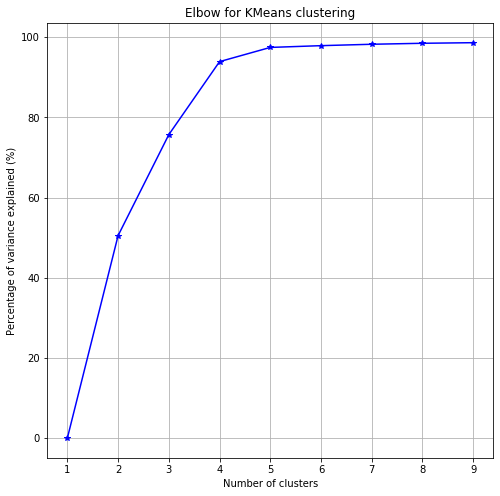

In [109]:
def plot_elbow(kmean, X_clus):
    centroids = [k.cluster_centers_ for k in kmean]
    D_k = [cdist(X_clus, center, 'euclidean') for center in centroids]
    dist = [np.min(D,axis=1) for D in D_k]

    # Total with-in sum of square
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(X_clus)**2)/X_clus.shape[0]
    bss = tss-wcss

    plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    ax = plt.subplot(1, 1, 1)
    ax.plot(Ks, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained (%)')
    plt.title('Elbow for KMeans clustering')
    plt.show()

plot_elbow(kmean, X_clus)

## From the elbow curve it can be seen that the best number of clusters are 4

- Will perform clustering on the latitude and longtiude 
- The cluster labels will be saved under 'Zone' variable

In [110]:
# fitting on my values
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_clus)

In [111]:
labels = kmeans.labels_

In [113]:
#creating copies to work 
auto_new,auto_test_new=auto.copy(),auto_test.copy()

In [115]:
auto_new['zone']=labels
auto_new.drop(['Latitude','Longitude'],axis=1,inplace=True)

In [118]:

label2=kmeans.predict(auto_test[['Latitude','Longitude']].values)

In [120]:
auto_test_new['zone']=label2
auto_test_new.drop(['Latitude','Longitude'],axis=1,inplace=True)

In [121]:
auto_new['zone']=auto_new['zone'].astype('category')
auto_test_new['zone']=auto_test_new['zone'].astype('category')

In [122]:
## creating new target and features variable 
new_x=auto_new.drop(['Customer.Lifetime.Value'],axis=1)
new_y=auto_new['Customer.Lifetime.Value']

In [123]:
train_new,val_new,y_newtrain,y_newtest=prepare_data(new_x,new_y,0.3)

(6864, 20)
(2942, 20)


In [128]:
train_new=preprocess_data(train_new)
val_new=preprocess_data(val_new)



In [126]:
estimators = [(DecisionTreeRegressor(),{'max_depth' : range(1,10), 
                                      'min_impurity_decrease' : [0.0001, 0.01]}),
              (RandomForestRegressor(), {'n_estimators' : [ 25, 50], 
                                          'max_depth' : [ 14, 16, 18], 
                                          'min_samples_leaf' : [5, 10]}),  
              (XGBRegressor(), {'colsample_bytree': [0.6], 
                                 'n_estimators':[100], 
                                 'max_depth': [10, 15]})]

In [130]:
for estimator, parameters in estimators :
    
    model_cv, model, pred_train, pred_test = model_building(train_new, y_newtrain,
                                                            val_new, estimator, parameters, 10)
    
    print('===================================================================\n\t\t\t',
          type(estimator).__name__,
          '\n===================================================================\n')
    
    print(model_cv.best_params_, '\n\n')
    
    model_evaluation(y_newtrain, pred_train, y_newtest, pred_test)

			 DecisionTreeRegressor 

{'max_depth': 5, 'min_impurity_decrease': 0.0001} 



                MAE and MSE FOR TRAIN DATA
Mean Absolute Error :  (1744.2091841195083, '\nRootMean Squared Error : ', 3694.8729916505577)

                MAE and MSE FOR TEST DATA
Mean Absolute Error :  1895.1243381636473 
RootMean Squared Error :  4298.1711606586105
			 RandomForestRegressor 

{'max_depth': 18, 'min_samples_leaf': 5, 'n_estimators': 25} 



                MAE and MSE FOR TRAIN DATA
Mean Absolute Error :  (1131.347252029791, '\nRootMean Squared Error : ', 2696.987986830876)

                MAE and MSE FOR TEST DATA
Mean Absolute Error :  1680.537945819926 
RootMean Squared Error :  4163.5383103960285
[04:22:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[04:22:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now dep

### The error has reduced as compared to the previous models with latitude and longitude as columns 
- We can do more feature engineering by combining categories of in some of the categorical variables
- we can drop insignificant categorical variables as well

In [134]:
# merging categories 
auto_new['Vehicle.Class'].replace({'Luxury SUV':'Luxury','Luxury Car':'Luxury','Sports Car':'Sports','SUV':'Sports',
                                  'Four-Door Car':'Ordinary','Two-Door Car':'Ordinary'},inplace=True)
auto_new['Number.of.Policies'].replace({'1':'1','2':'2','3':'others','4':'others','5':'others','6':'others',
                                       '7':'others','8':'others','9':'others'},inplace=True)



In [136]:
X_featured=auto_new.drop(['Customer.Lifetime.Value','Marital.Status','Vehicle.Size','Sales.Channel','Gender'],axis=1)
Y_featured=auto_new['Customer.Lifetime.Value']

In [137]:
train_feat,val_feat,y_trainfeat,y_testfeat=prepare_data(X_featured,Y_featured,0.3)

(6864, 16)
(2942, 16)


In [140]:
train_feat=preprocess_data(train_feat)
val_feat=preprocess_data(val_feat)

In [138]:
estimators = [(DecisionTreeRegressor(),{'max_depth' : range(1,10), 
                                      'min_impurity_decrease' : [0.0001, 0.01]}),
              (RandomForestRegressor(), {'n_estimators' : [ 25, 50], 
                                          'max_depth' : [ 14, 16, 18], 
                                          'min_samples_leaf' : [5, 10]}),  
              (XGBRegressor(), {'colsample_bytree': [0.6], 
                                 'n_estimators':[100], 
                                 'max_depth': [10, 15]})]

In [141]:
for estimator, parameters in estimators :
    
    model_cv, model, pred_train, pred_test = model_building(train_feat, y_trainfeat,
                                                            val_feat, estimator, parameters, 10)
    
    print('===================================================================\n\t\t\t',
          type(estimator).__name__,
          '\n===================================================================\n')
    
    print(model_cv.best_params_, '\n\n')
    
    model_evaluation(y_trainfeat, pred_train, y_testfeat, pred_test)

			 DecisionTreeRegressor 

{'max_depth': 5, 'min_impurity_decrease': 0.0001} 



                MAE and MSE FOR TRAIN DATA
Mean Absolute Error :  (1811.1502657655217, '\nRootMean Squared Error : ', 3803.170396224124)

                MAE and MSE FOR TEST DATA
Mean Absolute Error :  1848.1123799605057 
RootMean Squared Error :  4161.589277688657
			 RandomForestRegressor 

{'max_depth': 16, 'min_samples_leaf': 5, 'n_estimators': 50} 



                MAE and MSE FOR TRAIN DATA
Mean Absolute Error :  (1166.922650087743, '\nRootMean Squared Error : ', 2752.70147830972)

                MAE and MSE FOR TEST DATA
Mean Absolute Error :  1634.6648481977702 
RootMean Squared Error :  3929.849698428277
[05:00:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:00:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprec

## The errors have reduced after feature engineering but the points still to be considered are 
- The models seem to overfit 
- Some more feature engineering can be done 
- we can drop few more categorical columns of low significance

### There is more scope of improving the model by feature manipulation and using hyper parameter tuning of models

# BUSINESS INSIGHTS OR LOOKING AT POINT OF VIEW OF BUSINESS        PROBLEM 

-  Customers with different life time values can be clubbed as clusters and different policies can be pitched to them 
-  Regions of high employment can be seen where marketting strategies could be built for different segments 
-  The buying capacity of the people can be found out thereby pitching of new offers or new policy/product can be sold
-  Regions can be spotted where revenues could be increased by different products.
-  Right public could be targetted for new ventures or policies or product launch